In [1]:
from sklearn import cluster, preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/snsdata.csv')
data = data.drop(['gradyear', 'gender','age','friends'], axis=1)
data.shape

(30000, 36)

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)
X_norm = scaler.transform(data)
X_norm[0][0]

-0.3322172643985876

In [4]:
kmeans = cluster.KMeans(n_clusters=9, random_state=42)
kmeans.fit(X_norm)
kmeans.inertia_


c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1033997746

In [5]:
labels = kmeans.predict(X_norm)
data['labels'] = labels

In [6]:
data['labels'].value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: labels, dtype: int64

In [7]:
def get_inertia(cluster_num, X):
    kmeans = cluster.KMeans(n_clusters=cluster_num, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    return inertia

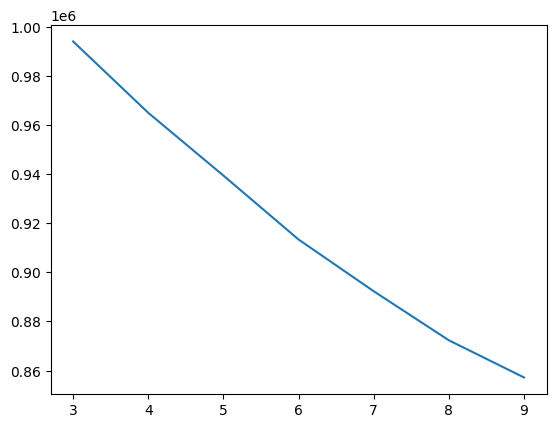

In [8]:
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
plt.plot([i for i in range(3, 10)], inertia)

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

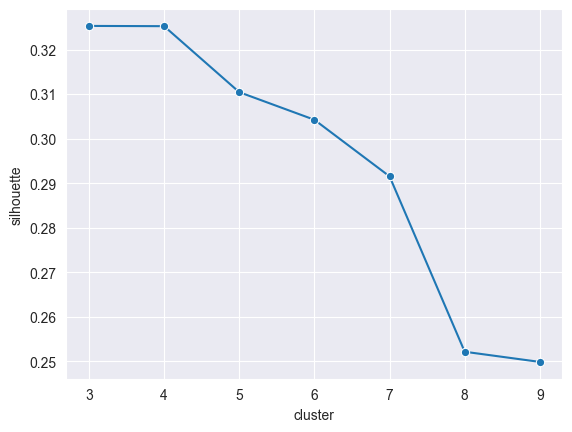

In [9]:
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = X_norm

for cluster_num in range(3, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [10]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_norm)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [11]:
labels = kmeans.predict(X_norm)
data['labels'] = labels

In [12]:
data.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [13]:
top_list = []
for label, group in data.groupby('labels'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False) #группируем данные по кластерам
    top_10 = set(means.head(10).index)
    top_list.append(top_10)


set.intersection(*top_list) #пересечение множеств

{'dance', 'god', 'hair', 'music'}

In [14]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [15]:
em = GaussianMixture(n_components=3, random_state=42)
em.fit(X_norm)
em_labels = em.predict(X_norm)
data['em_labels'] = em_labels
data['em_labels']. value_counts()

0    23426
1     6573
2        1
Name: em_labels, dtype: int64

In [16]:
data[data['em_labels']==2].squeeze()


basketball        0
football          2
soccer            0
softball          0
volleyball        0
swimming          1
cheerleading      0
baseball          0
tennis            0
sports            0
cute              1
sex              22
sexy              1
hot               0
kissed            0
dance             1
band              1
marching          0
music             0
rock              1
god              10
church            0
jesus             1
bible             0
hair             12
dress             2
blonde          327
mall              0
shopping          0
clothes           1
hollister         0
abercrombie       0
die               6
death             6
drunk             6
drugs             0
labels            1
em_labels         2
Name: 14187, dtype: int64